### Name  : Reena Rajendra Prasad
### Project : Credit card customer Segmentation

##### GIt Hub : https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-Reena-R/blob/master/Credit%20card%20Customer%20Segmentation%20Project-Reena%20Rajendra%20Prasad-Final.ipynb

#### Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

##### Attributes 

Customer key - Identifier for the customer

Average Credit Limit - Average credit limit across all the credit cards

Total credit cards - Total number of credit cards

Total visits bank - Total number of bank visits

Total visits online - total number of online visits

Total calls made - Total number of calls made by the customer



In [4]:
# Import necessary Libraries to read and analyse data
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#Read the data and displat first 10 rows
dfCredit =  pd.read_excel('Credit Card Customer Data.xlsx')
dfCredit.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


## Q1 & Q2 Perform univariate analysis   and  Perform EDA

In [6]:
#Check the columns data types number of records using info
dfCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
# Check nulls
dfCredit.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

#### Insights  : It is evident that no null values are present in the data and all columns are of type integer

In [8]:
#Check Row duplicates 
dfCredit[dfCredit.duplicated()==True]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [9]:
# Check duplicates in customer id field
dfCredit['Customer Key'].nunique()

655

##### Insights  : 5 Customer Keys are repeated   Total rows are 660 but Customer Key has only 655  uniques 

In [10]:
#Construct a temporary dataframe with duplicate Customer Keys 

condn=dfCredit.groupby('Customer Key')[['Sl_No']].count().reset_index()

dups= condn[condn['Sl_No']>1][['Customer Key']]

Dup_cust =dfCredit[dfCredit['Customer Key'].isin(list(dups['Customer Key']))].sort_values('Customer Key')
Dup_cust 

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


In [11]:
# Drop Duplicate Customers from the main DataFrame 
dfCredit=dfCredit.drop(dfCredit[dfCredit['Customer Key'].isin(list(dups['Customer Key']))].index)

In [12]:
# Find the mean Values from the  Duplicated Customers dataframe
dup_Mean_val =Dup_cust.groupby('Customer Key').mean().reset_index()
dup_Mean_val

,Customer Key,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,37252,241.0,32500.0,5.0,1.0,1.5,5.0
1,47437,169.0,58500.0,6.5,1.5,6.5,1.5
2,50706,477.0,52000.0,5.5,5.0,1.0,2.0
3,96929,395.5,40000.0,5.0,3.5,1.0,1.0
4,97935,369.0,102000.0,4.5,1.0,4.5,5.0


In [13]:
# Add back the Mean Values from the  Duplicated Customerd dataframe
dfCredit= pd.concat([dfCredit,dup_Mean_val]).reset_index(drop=True)
dfCredit

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.0,87073,100000.0,2.0,1.0,1.0,0.0
1,2.0,38414,50000.0,3.0,0.0,10.0,9.0
2,3.0,17341,50000.0,7.0,1.0,3.0,4.0
3,4.0,40496,30000.0,5.0,1.0,1.0,4.0
4,6.0,58634,20000.0,3.0,0.0,1.0,8.0
...,...,...,...,...,...,...,...
650,241.0,37252,32500.0,5.0,1.0,1.5,5.0
651,169.0,47437,58500.0,6.5,1.5,6.5,1.5
652,477.0,50706,52000.0,5.5,5.0,1.0,2.0
653,395.5,96929,40000.0,5.0,3.5,1.0,1.0


In [14]:
dfCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sl_No                655 non-null    float64
 1   Customer Key         655 non-null    int64  
 2   Avg_Credit_Limit     655 non-null    float64
 3   Total_Credit_Cards   655 non-null    float64
 4   Total_visits_bank    655 non-null    float64
 5   Total_visits_online  655 non-null    float64
 6   Total_calls_made     655 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 35.9 KB


In [15]:
#Drop the Sl_No column as it does not add value in this analysis and is redundant
dfCredit_New=  dfCredit.drop('Sl_No', axis=1)

In [16]:
#Drop the Customer Key column as it does not add value in this analysis and is redundant
dfCredit_New=  dfCredit_New.drop('Customer Key', axis=1)

In [17]:
#Describe the data 
dfCredit_New.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,655.0,34403.053435,37231.630815,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,655.0,4.701527,2.167101,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,655.0,2.403053,1.626940,0.0,1.0,2.0,4.0,5.0
Total_visits_online,655.0,2.603817,2.920177,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.588550,2.851676,0.0,1.0,3.0,5.0,10.0


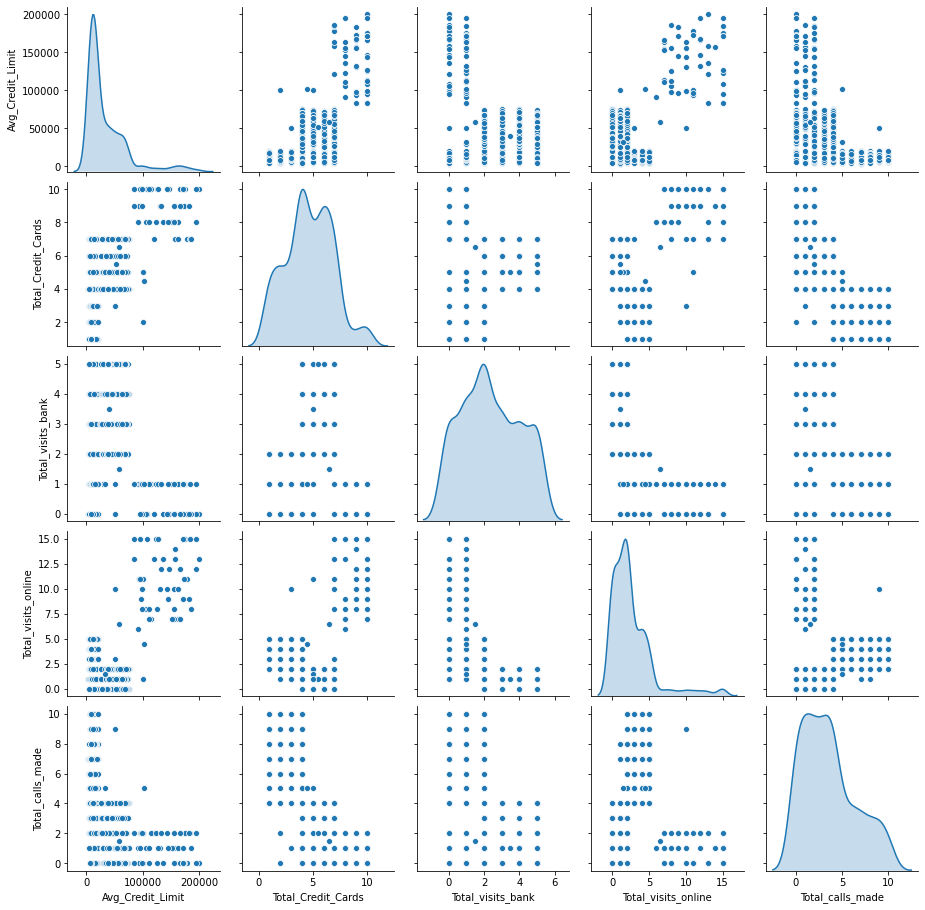

In [18]:
#Pairplot to analyse the distributions of data 
sns.pairplot(dfCredit_New,diag_kind='kde')

#### Insights  : From the KDE we can estimate atleaset 4 to 5 distinct clusters 

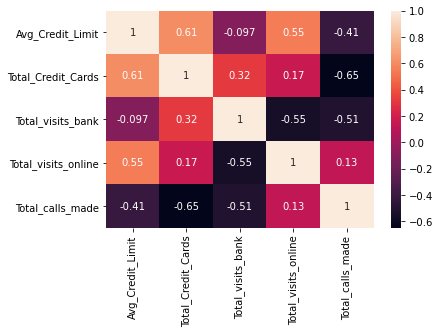

In [19]:
sns.heatmap(dfCredit_New.corr(),annot=True)

In [20]:
#Heat map shows some correlation between the   Variables

In [21]:
#Check the Sum  to see the  support requests
dfCredit_New.sum()

Avg_Credit_Limit       22534000.0
Total_Credit_Cards         3079.5
Total_visits_bank          1574.0
Total_visits_online        1705.5
Total_calls_made           2350.5
dtype: float64

#### Insigts :  Most of the  support request come through the Call center    followed by  Live vists and Online requests 

#### Check for outliers

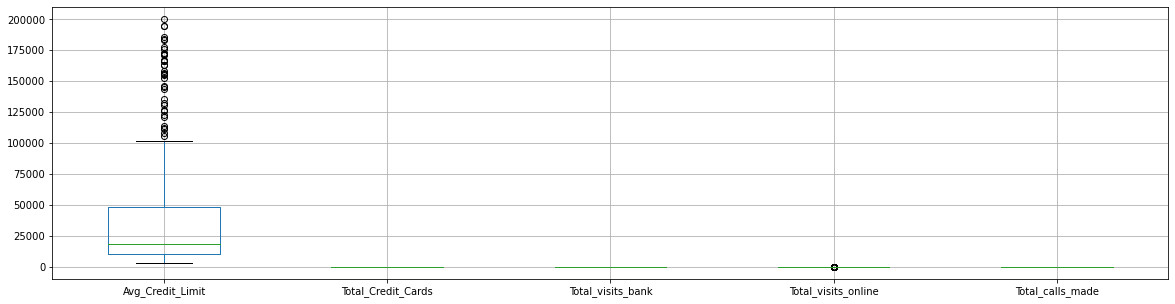

In [22]:
dfCredit_New.boxplot(figsize=(20,5))

In [23]:
dfCredit_Original =dfCredit_New.copy()

#### Insights  :    Box plot  Shows outliers in Avg_Credit_Limit and Total_Visits _Online

{'whiskers': [<matplotlib.lines.Line2D at 0xa8fa845580>,
 'caps': [<matplotlib.lines.Line2D at 0xa8fa845c40>,
 'boxes': [<matplotlib.lines.Line2D at 0xa8fa845220>],
 'medians': [<matplotlib.lines.Line2D at 0xa8fa84d340>],
 'fliers': [<matplotlib.lines.Line2D at 0xa8fa84d640>],
 'means': []}

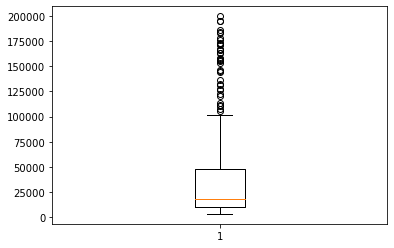

In [24]:
#Box Plot For  Avg_Credit_Limit
plt.boxplot(dfCredit_New['Avg_Credit_Limit'])

#### The Boxplot shows there are a number of outlier and skewness in data

{'whiskers': [<matplotlib.lines.Line2D at 0xa8fa89ea60>,
 'caps': [<matplotlib.lines.Line2D at 0xa8fa8ac160>,
 'boxes': [<matplotlib.lines.Line2D at 0xa8fa89e700>],
 'medians': [<matplotlib.lines.Line2D at 0xa8fa8ac820>],
 'fliers': [<matplotlib.lines.Line2D at 0xa8fa8acb20>],
 'means': []}

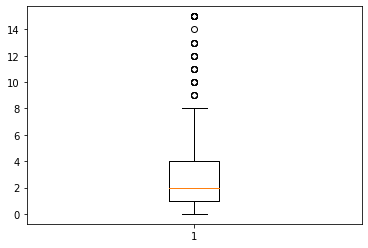

In [25]:
#Box Plot For  Total_visits_online
plt.boxplot(dfCredit_New['Total_visits_online'])

In [26]:
## Use Log Transformation to remove Outliers  from   Avg_Credit_Limit
dfCredit_New['Avg_Credit_Limit'] = np.log(dfCredit_New['Avg_Credit_Limit'])


In [27]:
#Analyss the data  for  The column Total_Visits_Online for Outliers
#find out the Trend for Total_Visits_Online 
dfCredit.groupby(['Total_visits_online'])[['Customer Key']].count()


,Customer Key
Total_visits_online,
0.0,142
1.0,109
1.5,1
2.0,185
3.0,44
4.0,69
4.5,1
5.0,54
6.0,1


#### Insights  : From  grouping the  Customers by  Total_visits_online  we can see that there is  very small number of data points in this category.So we can merge  anything greater Than 5 with  5 

In [28]:
#Replace anything greater than 5 with 5
dfCredit_New['Total_visits_online'] = np.where(dfCredit_New['Total_visits_online'] >5,5,dfCredit_New['Total_visits_online'] )

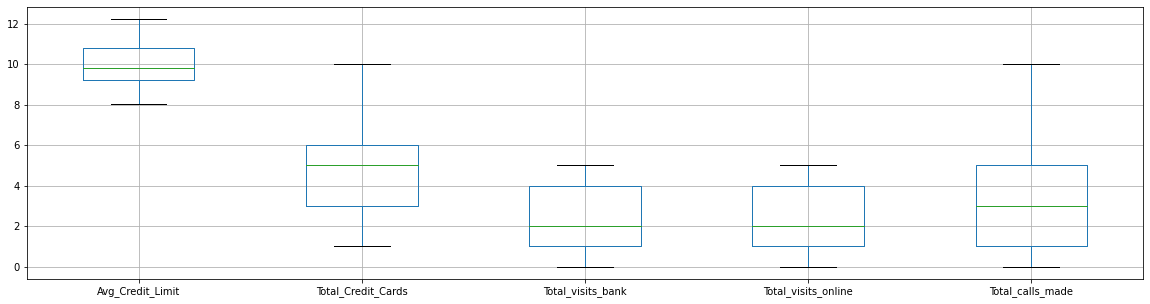

In [29]:
#Recheck the boxPlot for outliers 
dfCredit_New.boxplot(figsize=(20,5))

#### The Outliers are effectively treated   using Log Transformation of Avg_Credit_Limit and  merging of higher numer of  Total_visits_online

In [30]:
#Scale the data to  getrid of the units
from scipy.stats import zscore
dfCredit_Scaled =dfCredit_New.apply(zscore)
dfCredit_Scaled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.637211,-1.247561,-0.863047,-0.675343,-1.259362
1,0.889618,-0.785763,-1.478168,1.658957,1.899089
2,0.889618,1.061432,-0.863047,0.491807,0.144394
3,0.338667,0.137835,-0.863047,-0.675343,0.144394
4,-0.098647,-0.785763,-1.478168,-0.675343,1.548150
5,1.637211,0.137835,-1.478168,1.658957,-0.557484
6,-0.408926,-0.785763,-1.478168,-0.675343,-0.908423
7,-1.593834,-1.247561,-1.478168,-0.091768,-0.557484
8,-2.144785,-0.323964,-1.478168,-0.675343,1.197211
9,-0.846241,-0.323964,-1.478168,1.658957,0.495333


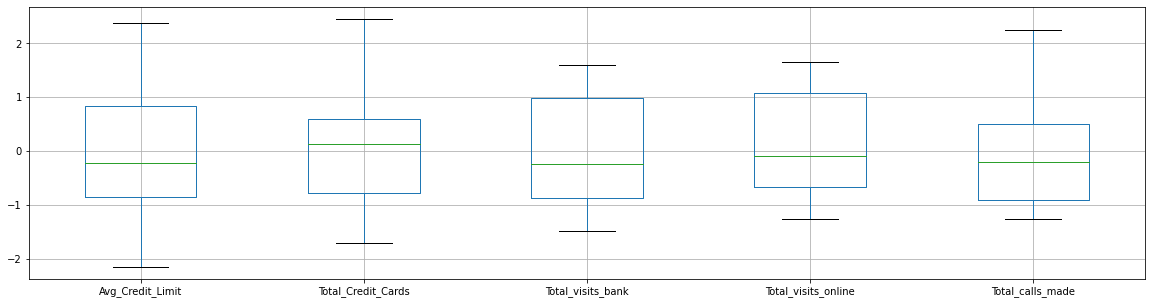

In [31]:
#Recheck the boxPlot for outliers   on the scalaed data

dfCredit_Scaled.boxplot(figsize=(20,5))

## Q3. Execute K-means clustering use elbow plot and analyse clusters using boxplot

### KMeans Clustering 

Text(0.5, 1.0, 'Ideal K - Elbow Method')

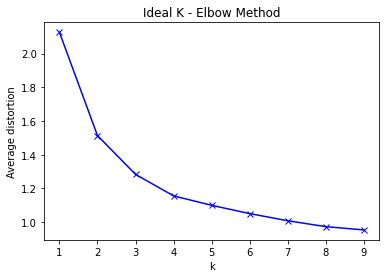

In [32]:
#Finding optimal number of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfCredit_Scaled) 
    meanDistortions.append(sum(np.min(cdist(dfCredit_Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfCredit_Scaled
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Ideal K - Elbow Method')

#### Insights  : From the elbow we can see the ideal value of K as 4


In [33]:
#Kmeans Clustering with K  as 4
kmeans = KMeans(n_clusters=4, n_init = 5, random_state=7)
kmeans.fit(dfCredit_Scaled)

KMeans(n_clusters=4, n_init=5, random_state=7)

In [34]:
# Checking the Number of values in each cluster
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[220 217 167  51]


In [35]:
# Add back the  LAbels into the DAtaframe for Analysis
df_Kmeans =dfCredit_New.copy()
df_Kmeans['Labels'] =kmeans.labels_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A8FC6B3190>,
      dtype=object)

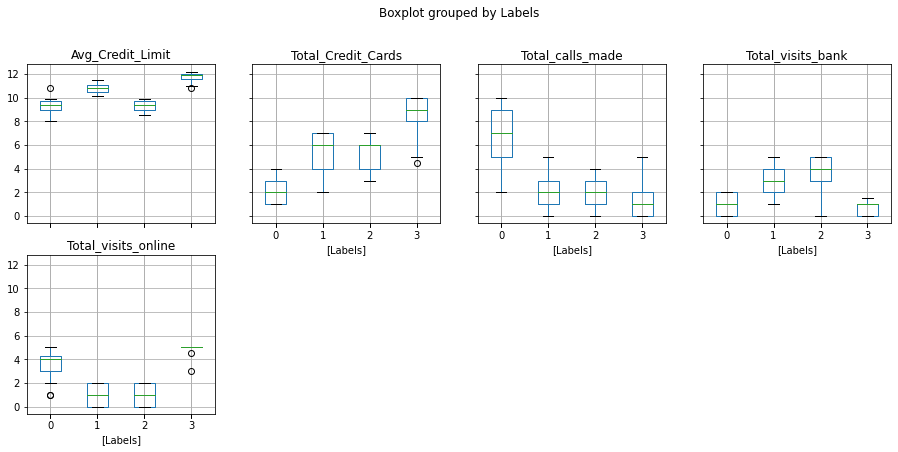

In [36]:
## Visualize the groups 
df_Kmeans.boxplot(by = 'Labels',  layout=(3,4), figsize=(15, 10))

### KMeans - Group Charcteristics from the Box Plot
Group 0

Lower credit Limits , Slightly high number of credit cards ,very few Support calls, Prefer to Visit Banks  ,  Very Low number of Online visits

Group 1

Lower credit Limits , Less number of credit cards , High number of Support calls ,Very few Bank visits ,  High number of Online visits

Group 2

Higher credit Limits , More number of credit cards , Very few Support calls , few Bank visits ,   Very Low number of Online visits  

Group 3

Very High credit Limits , Most number of credit cards , Lowest number of Support calls , Lowest number of Bank visits ,   Very High number of Online visits   

### Kmeans with K=3
#### From the Boxplot above  we can infer that  some of the characteristice has overlap , such as total Credit cards  ,  total online visits , So Evaluvating  k means  with K= 3

In [37]:
#Kmeans Clustering with K  as 3
kmeans = KMeans(n_clusters=3, n_init = 5, random_state=7)
kmeans.fit(dfCredit_Scaled)

KMeans(n_clusters=3, n_init=5, random_state=7)

In [38]:
# Checking the Number of values in each cluster
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[221  51 383]


In [39]:
# Add back the  LAbels into the DAtaframe for Analysis
df_Kmeans_3 =dfCredit_New.copy()
df_Kmeans_3['Labels'] =kmeans.labels_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A8FCB44C70>,
      dtype=object)

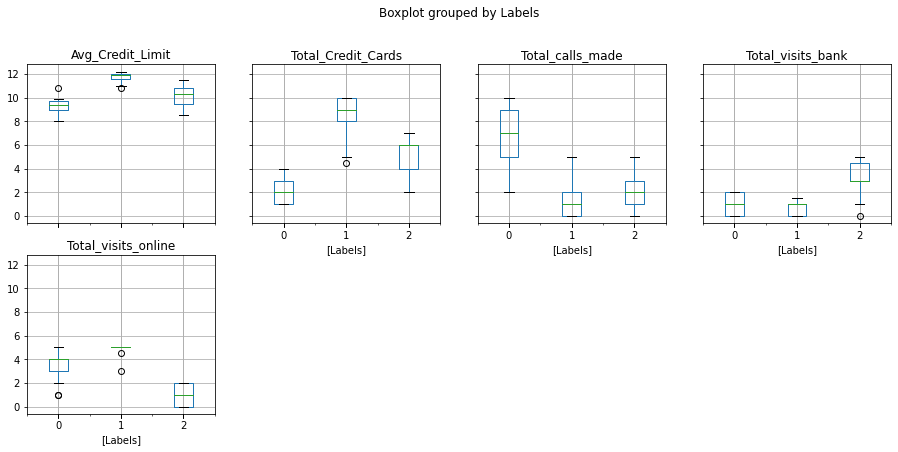

In [40]:
## Visualize the groups 
df_Kmeans_3.boxplot(by = 'Labels',  layout=(3,4), figsize=(15, 10))

### KMeans - Group Charcteristics from the Box Plot K=3
Group 0

Lower credit Limits , Low number of credit cards , Highest Support calls, Less Visit to Banks  ,  Medium number of Online visits

Group 1

Highest credit Limits , Highest number of credit cards , Lowest number of Support calls ,Lowest Bank visits ,  Highest number of Online visits

Group 2

Medium range credit Limits , Medium Number  of credit cards , Very few Support calls , Highest Bank visits ,   Very Low number of Online visits  



### Insights 
####  K Means with k=3 have very distinctive characteristics based on credit Limits , Online Visits and Support calls

## Q4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot

### Hierarchical clustering (with different linkages) - Euclidean

In [41]:
# Import the Libraries
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
# For pairwise distance 
from scipy.spatial.distance import pdist

In [42]:
#Linkage using average method
Z=linkage(dfCredit_Scaled, metric='euclidean',method='average')
c, coph_dists = cophenet(Z , pdist(dfCredit_Scaled))
print('Cophenetic using average method ---', c)
df_cophenetic = pd.DataFrame({'Metric':['euclidean'],'Method':['Average'],'Cophenetic_Coeff':c})

Cophenetic using average method --- 0.8466149516525787


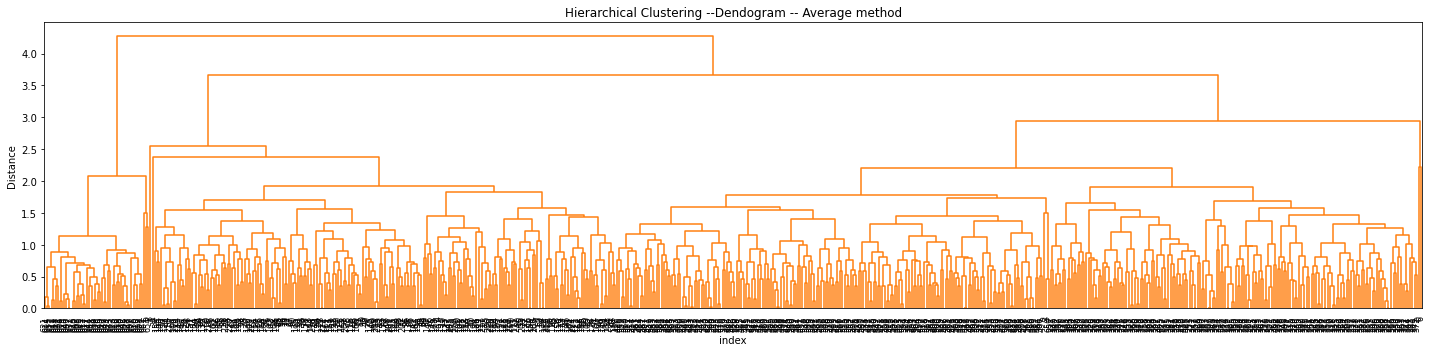

In [43]:
plt.figure(figsize=(20, 5))
plt.title('Hierarchical Clustering --Dendogram -- Average method')
plt.xlabel('index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40., leaf_font_size=8. )
plt.tight_layout()

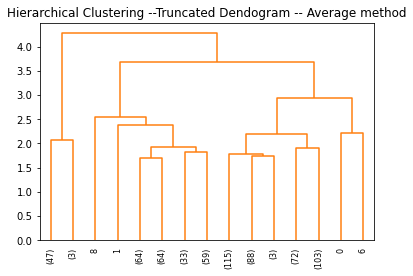

In [44]:
#Truncated Dendrogram 
plt.title('Hierarchical Clustering --Truncated Dendogram -- Average method')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=15,  # show only the last p merged clusters
    leaf_rotation=90.,color_threshold = 40., leaf_font_size=8.
)
plt.show()

In [45]:
max_d=3.1
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

df_average =dfCredit_New.copy()
df_average['Labels'] =clusters
clusters

array([3, 2, 3, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [46]:
#Linkage using Complete method
Z=linkage(dfCredit_Scaled, metric='euclidean',method='complete')
c, coph_dists = cophenet(Z , pdist(dfCredit_Scaled))
print('Cophenetic using complete method ---', c)
temp_df=pd.DataFrame({'Metric':['euclidean'],'Method':['Complete'],'Cophenetic_Coeff':c})
df_cophenetic= pd.concat([df_cophenetic,temp_df])

Cophenetic using complete method --- 0.819786652614521


In [47]:
df_cophenetic

,Metric,Method,Cophenetic_Coeff
0,euclidean,Average,0.846615
0,euclidean,Complete,0.819787


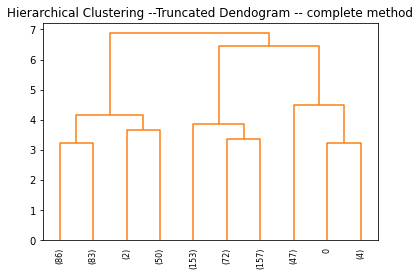

In [48]:
#Truncated Dendrogram 
plt.title('Hierarchical Clustering --Truncated Dendogram -- complete method')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,color_threshold = 40., leaf_font_size=8.
)
plt.show()

In [49]:
max_d=4.75
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

df_complete=dfCredit_New.copy()
df_complete['Labels'] =clusters
clusters

array([3, 1, 3, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [50]:
#Linkage using WARD method
Z=linkage(dfCredit_Scaled, metric='euclidean',method='ward')
c, coph_dists = cophenet(Z , pdist(dfCredit_Scaled))
print('Cophenetic using Ward method ---', c)
temp_df=pd.DataFrame({'Metric':['euclidean'],'Method':['Ward'],'Cophenetic_Coeff':c})
df_cophenetic= pd.concat([df_cophenetic,temp_df])
df_cophenetic

Cophenetic using Ward method --- 0.7842158023126801


,Metric,Method,Cophenetic_Coeff
0,euclidean,Average,0.846615
0,euclidean,Complete,0.819787
0,euclidean,Ward,0.784216


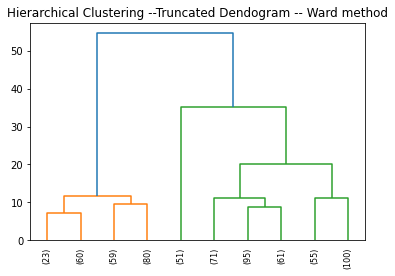

In [51]:
#Truncated Dendrogram 
plt.title('Hierarchical Clustering --Truncated Dendogram -- Ward method')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,color_threshold = 40., leaf_font_size=8.
)
plt.show()

In [52]:
max_d=25
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

df_ward=dfCredit_New.copy()
df_ward['Labels'] =clusters
clusters

array([3, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [53]:
#Linkage using Centroid method
Z=linkage(dfCredit_Scaled, metric='euclidean',method='centroid')
c, coph_dists = cophenet(Z , pdist(dfCredit_Scaled))
print('Cophenetic using centroid method ---', c)
temp_df=pd.DataFrame({'Metric':['euclidean'],'Method':['Centroid'],'Cophenetic_Coeff':c})
df_cophenetic= pd.concat([df_cophenetic,temp_df])
df_cophenetic

Cophenetic using centroid method --- 0.8434726784238511


,Metric,Method,Cophenetic_Coeff
0,euclidean,Average,0.846615
0,euclidean,Complete,0.819787
0,euclidean,Ward,0.784216
0,euclidean,Centroid,0.843473


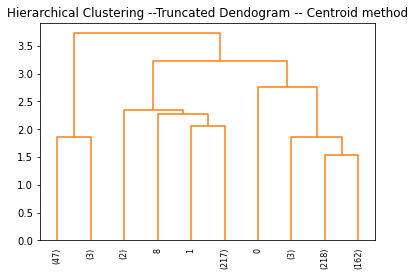

In [54]:
#Truncated Dendrogram 
plt.title('Hierarchical Clustering --Truncated Dendogram -- Centroid method')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,color_threshold = 40., leaf_font_size=8.
)
plt.show()

In [55]:
max_d=3
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

df_centroid=dfCredit_New.copy()
df_centroid['Labels'] =clusters
clusters

array([3, 2, 3, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [56]:
#Linkage using Single/minimum method
Z=linkage(dfCredit_Scaled, metric='euclidean',method='single')
c, coph_dists = cophenet(Z , pdist(dfCredit_Scaled))
print('Cophenetic using single method ---', c)
temp_df=pd.DataFrame({'Metric':['euclidean'],'Method':['Single'],'Cophenetic_Coeff':c})
df_cophenetic= pd.concat([df_cophenetic,temp_df])
df_cophenetic

Cophenetic using single method --- 0.5733501268148422


,Metric,Method,Cophenetic_Coeff
0,euclidean,Average,0.846615
0,euclidean,Complete,0.819787
0,euclidean,Ward,0.784216
0,euclidean,Centroid,0.843473
0,euclidean,Single,0.573350


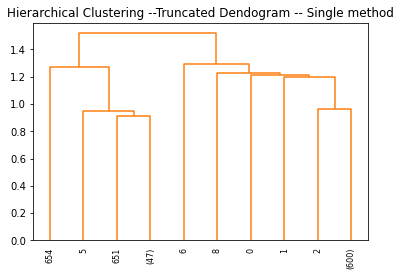

In [57]:
#Truncated Dendrogram 
plt.title('Hierarchical Clustering --Truncated Dendogram -- Single method')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,color_threshold = 40., leaf_font_size=8.
)
plt.show()

In [58]:
max_d=1.25
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

df_single=dfCredit_New.copy()
df_single['Labels'] =clusters
clusters

array([3, 3, 3, 3, 3, 1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

### Hierarchical clustering (with different linkages) - Manhattan distance


In [59]:
#Linkage using average method
Z=linkage(dfCredit_Scaled, metric='cityblock',method='average')
c, coph_dists = cophenet(Z , pdist(dfCredit_Scaled))
print('Cophenetic using average method ---', c)
temp_df=pd.DataFrame({'Metric':['manhattan'],'Method':['average'],'Cophenetic_Coeff':c})
df_cophenetic= pd.concat([df_cophenetic,temp_df])
df_cophenetic

Cophenetic using average method --- 0.8401903695453131


,Metric,Method,Cophenetic_Coeff
0,euclidean,Average,0.846615
0,euclidean,Complete,0.819787
0,euclidean,Ward,0.784216
0,euclidean,Centroid,0.843473
0,euclidean,Single,0.573350
0,manhattan,average,0.840190


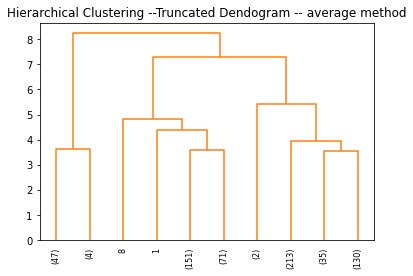

In [60]:
#Truncated Dendrogram 
plt.title('Hierarchical Clustering --Truncated Dendogram -- average method')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,color_threshold = 40., leaf_font_size=8.
)
plt.show()

In [61]:
max_d=7
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

df_average_man=dfCredit_New.copy()
df_average_man['Labels'] =clusters
clusters

array([3, 2, 1, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [62]:
#Linkage using Complete method
Z=linkage(dfCredit_Scaled, metric='cityblock',method='complete')
c, coph_dists = cophenet(Z , pdist(dfCredit_Scaled))
print('Cophenetic using complete method ---', c)
temp_df=pd.DataFrame({'Metric':['manhattan'],'Method':['complete'],'Cophenetic_Coeff':c})
df_cophenetic= pd.concat([df_cophenetic,temp_df])
df_cophenetic

Cophenetic using complete method --- 0.8179832384886422


,Metric,Method,Cophenetic_Coeff
0,euclidean,Average,0.846615
0,euclidean,Complete,0.819787
0,euclidean,Ward,0.784216
0,euclidean,Centroid,0.843473
0,euclidean,Single,0.573350
0,manhattan,average,0.840190
0,manhattan,complete,0.817983


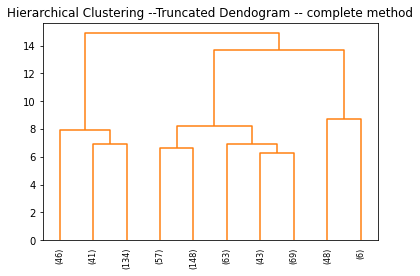

In [63]:
#Truncated Dendrogram 
plt.title('Hierarchical Clustering --Truncated Dendogram -- complete method')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,color_threshold = 40., leaf_font_size=8.
)
plt.show()

In [64]:
max_d=12
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

df_complete_man=dfCredit_New.copy()
df_complete_man['Labels'] =clusters
clusters

array([3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [65]:
#Linkage using single method
Z=linkage(dfCredit_Scaled, metric='cityblock',method='single')
c, coph_dists = cophenet(Z , pdist(dfCredit_Scaled))
print('Cophenetic using single method ---', c)
temp_df=pd.DataFrame({'Metric':['manhattan'],'Method':['single'],'Cophenetic_Coeff':c})
df_cophenetic= pd.concat([df_cophenetic,temp_df])
df_cophenetic

Cophenetic using single method --- 0.535273790616166


,Metric,Method,Cophenetic_Coeff
0,euclidean,Average,0.846615
0,euclidean,Complete,0.819787
0,euclidean,Ward,0.784216
0,euclidean,Centroid,0.843473
0,euclidean,Single,0.573350
0,manhattan,average,0.840190
0,manhattan,complete,0.817983
0,manhattan,single,0.535274


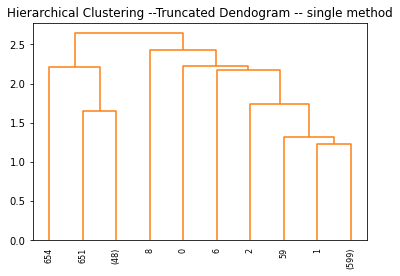

In [66]:
#Truncated Dendrogram 
plt.title('Hierarchical Clustering --Truncated Dendogram -- single method')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,color_threshold = 40., leaf_font_size=8.
)
plt.show()

In [67]:
max_d=2.3
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

df_single_man=dfCredit_New.copy()
df_single_man['Labels'] =clusters
set(clusters)

{1, 2, 3}

### Hierarchical clustering (with different linkages) - Chebyshev distance


In [68]:
#Linkage using average method
Z=linkage(dfCredit_Scaled, metric='chebyshev',method='average')
c, coph_dists = cophenet(Z , pdist(dfCredit_Scaled))
print('Cophenetic using average method ---', c)
temp_df=pd.DataFrame({'Metric':['chebyshev'],'Method':['average'],'Cophenetic_Coeff':c})
df_cophenetic= pd.concat([df_cophenetic,temp_df])
df_cophenetic

Cophenetic using average method --- 0.8425821149911298


,Metric,Method,Cophenetic_Coeff
0,euclidean,Average,0.846615
0,euclidean,Complete,0.819787
0,euclidean,Ward,0.784216
0,euclidean,Centroid,0.843473
0,euclidean,Single,0.573350
0,manhattan,average,0.840190
0,manhattan,complete,0.817983
0,manhattan,single,0.535274
0,chebyshev,average,0.842582


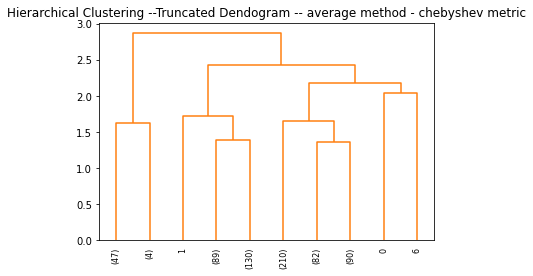

In [69]:
#Truncated Dendrogram 
plt.title('Hierarchical Clustering --Truncated Dendogram -- average method - chebyshev metric')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,color_threshold = 40., leaf_font_size=8.
)
plt.show()

In [70]:
max_d=2.3
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

df_average_cheb=dfCredit_New.copy()
df_average_cheb['Labels'] =clusters
set(clusters)

{1, 2, 3}

In [71]:
#Linkage using complete method
Z=linkage(dfCredit_Scaled, metric='chebyshev',method='complete')
c, coph_dists = cophenet(Z , pdist(dfCredit_Scaled))
print('Cophenetic using complete method ---', c)
temp_df=pd.DataFrame({'Metric':['chebyshev'],'Method':['complete'],'Cophenetic_Coeff':c})
df_cophenetic= pd.concat([df_cophenetic,temp_df])
df_cophenetic

Cophenetic using complete method --- 0.8155619778952138


,Metric,Method,Cophenetic_Coeff
0,euclidean,Average,0.846615
0,euclidean,Complete,0.819787
0,euclidean,Ward,0.784216
0,euclidean,Centroid,0.843473
0,euclidean,Single,0.573350
0,manhattan,average,0.840190
0,manhattan,complete,0.817983
0,manhattan,single,0.535274
0,chebyshev,average,0.842582
0,chebyshev,complete,0.815562


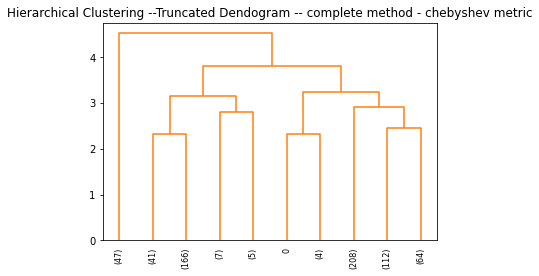

In [72]:
#Truncated Dendrogram 
plt.title('Hierarchical Clustering --Truncated Dendogram -- complete method - chebyshev metric')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,color_threshold = 40., leaf_font_size=8.
)
plt.show()

In [73]:
max_d=3.5
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

df_complete_cheb=dfCredit_New.copy()
df_complete_cheb['Labels'] =clusters
set(clusters)

{1, 2, 3}

In [74]:
#Linkage using single method
Z=linkage(dfCredit_Scaled, metric='chebyshev',method='single')
c, coph_dists = cophenet(Z , pdist(dfCredit_Scaled))
print('Cophenetic using single method ---', c)
temp_df=pd.DataFrame({'Metric':['chebyshev'],'Method':['single'],'Cophenetic_Coeff':c})
df_cophenetic= pd.concat([df_cophenetic,temp_df])
df_cophenetic

Cophenetic using single method --- 0.4923561604938518


,Metric,Method,Cophenetic_Coeff
0,euclidean,Average,0.846615
0,euclidean,Complete,0.819787
0,euclidean,Ward,0.784216
0,euclidean,Centroid,0.843473
0,euclidean,Single,0.573350
0,manhattan,average,0.840190
0,manhattan,complete,0.817983
0,manhattan,single,0.535274
0,chebyshev,average,0.842582
0,chebyshev,complete,0.815562


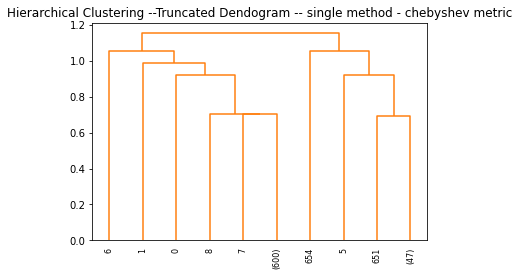

In [75]:
#Truncated Dendrogram 
plt.title('Hierarchical Clustering --Truncated Dendogram -- single method - chebyshev metric')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,color_threshold = 40., leaf_font_size=8.
)
plt.show()

In [76]:
max_d=0.9
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

df_sigle_cheb=dfCredit_New.copy()
df_sigle_cheb['Labels'] =clusters
set(clusters)

{1, 2, 3, 4, 5, 6, 7}

In [77]:
df_cophenetic.sort_values('Cophenetic_Coeff').reset_index(drop=True)

,Metric,Method,Cophenetic_Coeff
0,chebyshev,single,0.492356
1,manhattan,single,0.535274
2,euclidean,Single,0.573350
3,euclidean,Ward,0.784216
4,chebyshev,complete,0.815562
5,manhattan,complete,0.817983
6,euclidean,Complete,0.819787
7,manhattan,average,0.840190
8,chebyshev,average,0.842582
9,euclidean,Centroid,0.843473


#### Insights:   The cophenetic coefficient  is  high for average linkage  , which agrees with the grouping from boxplot  

### Hierarchical clustering (with different linkages) >> BOX Plot Comparison

********************Average Linkage**********************************************


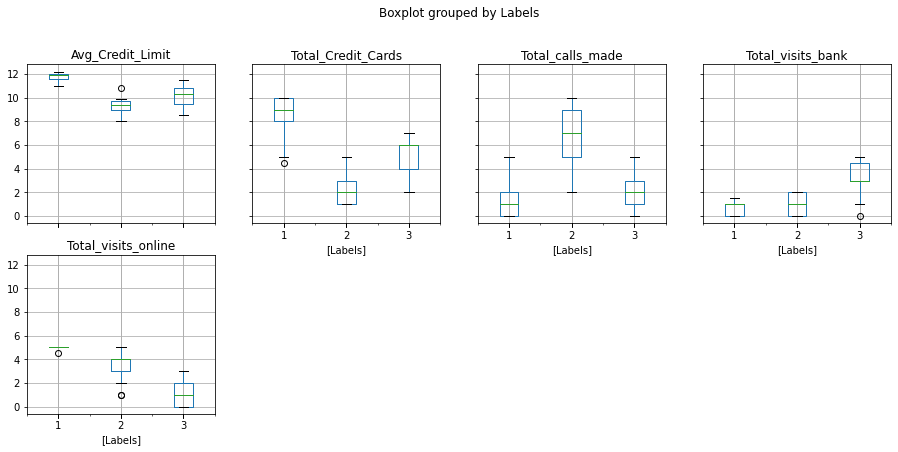

********************Complete Linkage**********************************************


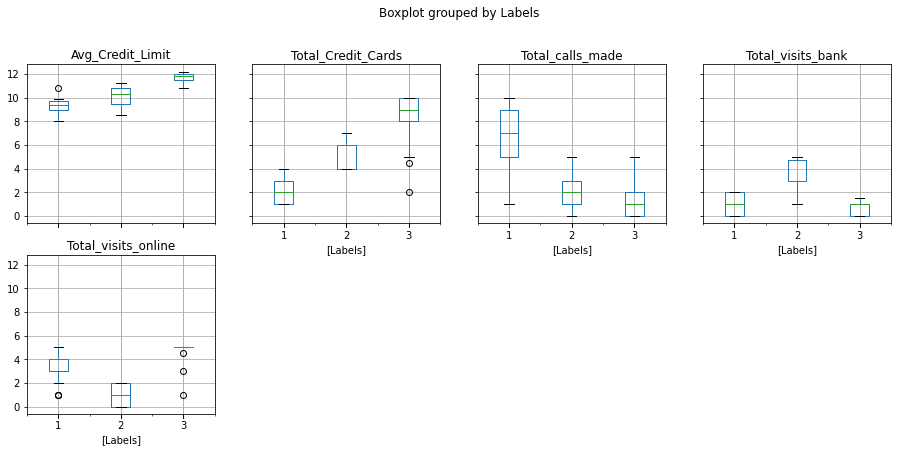

********************Ward Linkage**********************************************


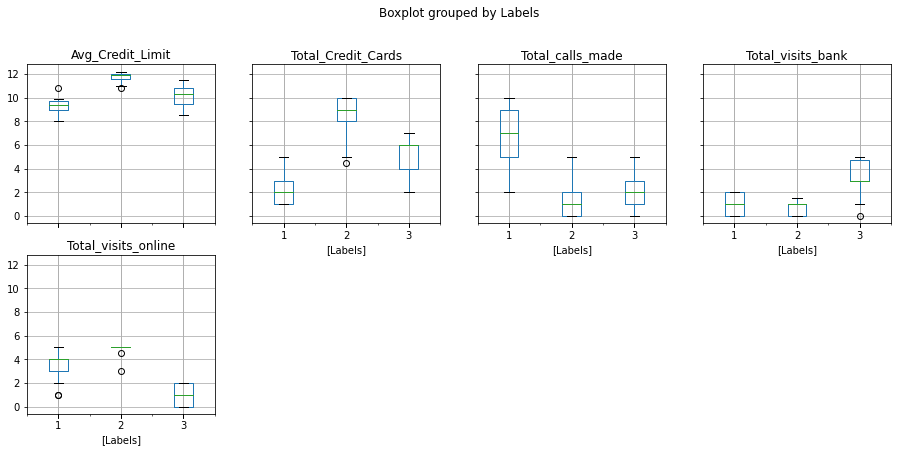

********************Single Linkage**********************************************


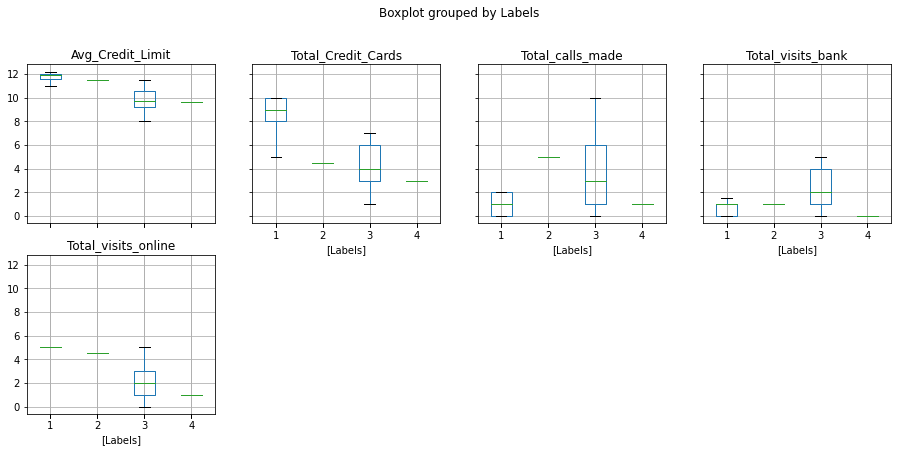

In [78]:
print('********************Average Linkage**********************************************')
df_average.boxplot(by = 'Labels',  layout=(3,4), figsize=(15, 10))
plt.show()
print('********************Complete Linkage**********************************************')
df_complete.boxplot(by = 'Labels',  layout=(3,4), figsize=(15, 10))
plt.show()
print('********************Ward Linkage**********************************************')
df_ward.boxplot(by = 'Labels',  layout=(3,4), figsize=(15, 10))
plt.show()
print('********************Single Linkage**********************************************')
df_single.boxplot(by = 'Labels',  layout=(3,4), figsize=(15, 10))
plt.show()

#### Insights:   average and complete linkages have very distinct grouping on almost all  variables 

## Q5. Calculate average silhouette score for both methods.

### Silhouette score for  Kmeans

In [79]:
clusters=range(2,10)
from sklearn.metrics import silhouette_score
for n_clusters in clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dfCredit_Scaled)
    score = silhouette_score(dfCredit_Scaled, preds)
    print("KMeans For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


KMeans For n_clusters = 2, silhouette score is 0.43205383062082653)
KMeans For n_clusters = 3, silhouette score is 0.4903169572594223)
KMeans For n_clusters = 4, silhouette score is 0.37565671975247944)
KMeans For n_clusters = 5, silhouette score is 0.33953532805119097)
KMeans For n_clusters = 6, silhouette score is 0.24375773469951123)
KMeans For n_clusters = 7, silhouette score is 0.2438085527246454)
KMeans For n_clusters = 8, silhouette score is 0.2435004275191725)
KMeans For n_clusters = 9, silhouette score is 0.22978030612283976)


### Silhouette score for  Hierarchical clustering

In [80]:
from sklearn.cluster.hierarchical import AgglomerativeClustering

clusters=range(2,10)
for n_clusters in clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',  linkage='average')
    preds = clusterer.fit_predict(dfCredit_Scaled)
   
    score = silhouette_score(dfCredit_Scaled, preds)
    print("AgglomerativeClustering For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


AgglomerativeClustering For n_clusters = 2, silhouette score is 0.3858505867212279)
AgglomerativeClustering For n_clusters = 3, silhouette score is 0.49033201893338835)
AgglomerativeClustering For n_clusters = 4, silhouette score is 0.3986901330327206)
AgglomerativeClustering For n_clusters = 5, silhouette score is 0.33529238158657215)
AgglomerativeClustering For n_clusters = 6, silhouette score is 0.2872120999932399)
AgglomerativeClustering For n_clusters = 7, silhouette score is 0.24397868884250176)
AgglomerativeClustering For n_clusters = 8, silhouette score is 0.2196519919111064)
AgglomerativeClustering For n_clusters = 9, silhouette score is 0.20482853289727646)


###  Insights  :  
Both Kmeans and Hierarchical clustering gives the highest silhoutte score  with number of clusters =3 

## Q6. Compare K-means clusters with Hierarchical clusters.

In [81]:
dfCredit_Scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_Credit_Limit     655 non-null    float64
 1   Total_Credit_Cards   655 non-null    float64
 2   Total_visits_bank    655 non-null    float64
 3   Total_visits_online  655 non-null    float64
 4   Total_calls_made     655 non-null    float64
dtypes: float64(5)
memory usage: 25.7 KB


In [82]:
#Kmeans with  Clusters =3
kmeans = KMeans(n_clusters=3, n_init = 5, random_state=7)
kmeans.fit(dfCredit_Scaled)
L=kmeans.labels_
# Data set with customer segmentation  for Kmeans
dfK_means = dfCredit_New.copy()
dfK_means['Labels'] = L
#Herrachicl Agglomerative model with  Clusters =3
Hmodel =AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
Hmodel.fit(dfCredit_Scaled)
L_H=Hmodel.labels_

# Data set with Hierarchical segmentation  for Kmeans
dfH_Clus = dfCredit_New.copy()
dfH_Clus['Labels'] = L_H

####  Boxplots For K Means

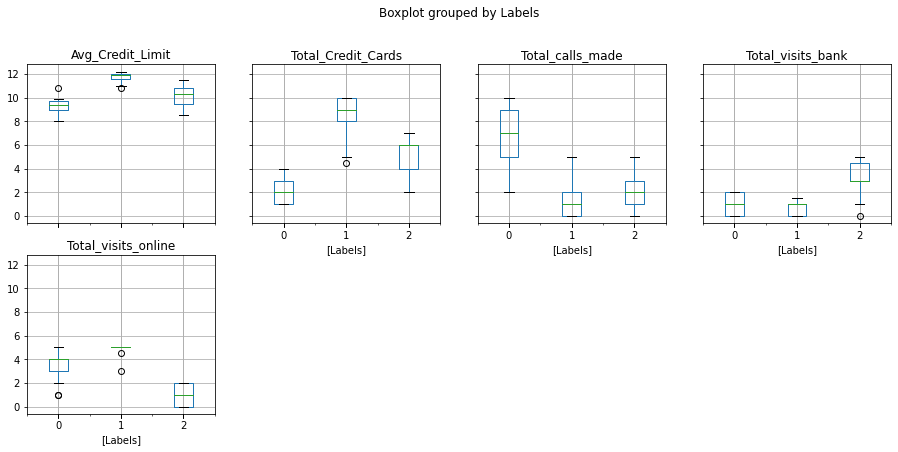

In [83]:
dfK_means.boxplot(by = 'Labels',  layout=(3,4), figsize=(15, 10))
plt.show()

### Insights    
: From the above Box Plot of K means clustering  we can infer
    ### Group 0   is with Low Credit Limit
    
    ### Group 1   is with High Credit Limit
    
    ### Group 2   is with Medium Credit Limit 

#### Box Plot for Hierarchical clustering 

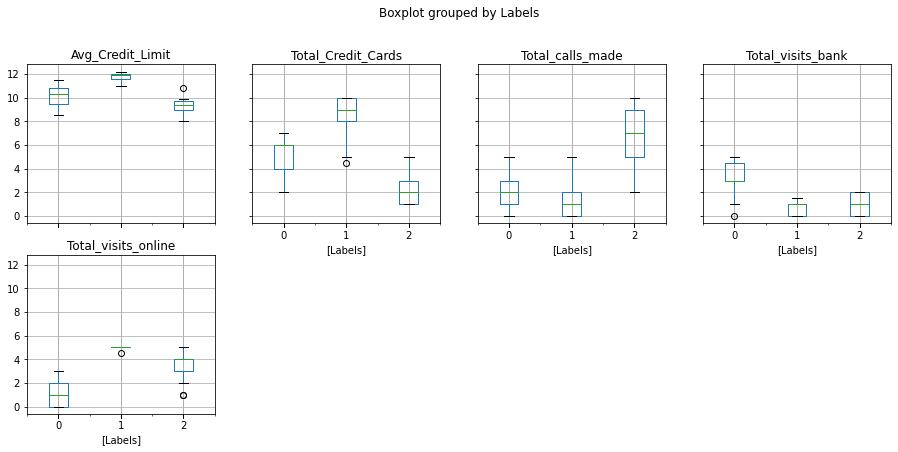

In [84]:
dfH_Clus.boxplot(by = 'Labels',  layout=(3,4), figsize=(15, 10))
plt.show()

### Insights    
: From the above Box Plot of Hierarchical clustering  we can infer
    ### Group 0   is with Medium Credit Limit
    
    ### Group 1   is with  High Credit Limit
    
    ### Group 2   is with Lowest Credit Limit 

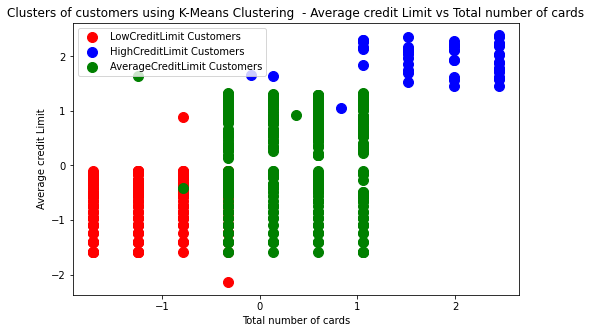

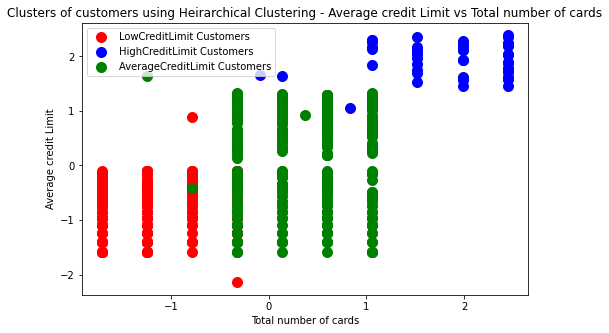

In [85]:
#Plotting Average credit Limit and the Total number of cards---- Kmean


plt.figure(figsize=(8,5))
plt.scatter(dfCredit_Scaled.iloc[L==0,1], dfCredit_Scaled.iloc[L==0,0], s = 100, c = 'red', label = 'LowCreditLimit Customers') 
plt.scatter(dfCredit_Scaled.iloc[L==1,1], dfCredit_Scaled.iloc[L==1,0], s = 100, c = 'blue', label = 'HighCreditLimit Customers')
plt.scatter(dfCredit_Scaled.iloc[L==2,1], dfCredit_Scaled.iloc[L==2,0], s = 100, c = 'green', label = 'AverageCreditLimit Customers') 
plt.title('Clusters of customers using K-Means Clustering  - Average credit Limit vs Total number of cards')
plt.ylabel('Average credit Limit')
plt.xlabel('Total number of cards')
plt.legend()
plt.show()
#Plotting Average credit Limit and the Total number of cards---- Hierarchical

plt.figure(figsize=(8,5))
plt.scatter(dfCredit_Scaled.iloc[L_H==2,1], dfCredit_Scaled.iloc[L_H==2,0], s = 100, c = 'red', label = 'LowCreditLimit Customers') 
plt.scatter(dfCredit_Scaled.iloc[L_H==1,1], dfCredit_Scaled.iloc[L_H==1,0], s = 100, c = 'blue', label = 'HighCreditLimit Customers')
plt.scatter(dfCredit_Scaled.iloc[L_H==0,1], dfCredit_Scaled.iloc[L_H==0,0], s = 100, c = 'green', label = 'AverageCreditLimit Customers') 
plt.title('Clusters of customers using Heirarchical Clustering - Average credit Limit vs Total number of cards')
plt.ylabel('Average credit Limit')
plt.xlabel('Total number of cards')
plt.legend()

plt.show()


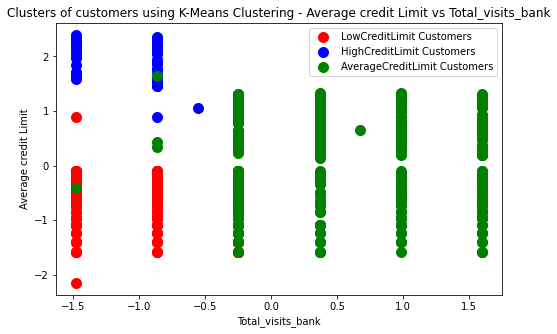

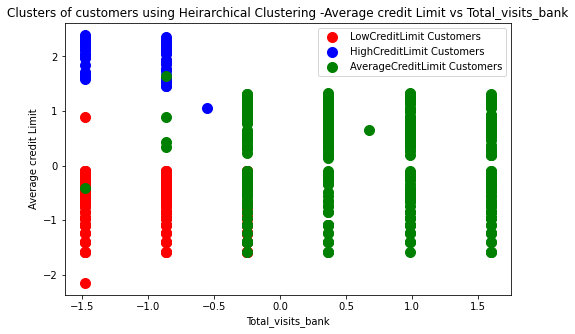

In [86]:


#Plotting Average credit Limit and the Total_visits_bank---- Kmean


plt.figure(figsize=(8,5))
plt.scatter(dfCredit_Scaled.iloc[L==0,2], dfCredit_Scaled.iloc[L==0,0], s = 100, c = 'red', label = 'LowCreditLimit Customers') 
plt.scatter(dfCredit_Scaled.iloc[L==1,2], dfCredit_Scaled.iloc[L==1,0], s = 100, c = 'blue', label = 'HighCreditLimit Customers')
plt.scatter(dfCredit_Scaled.iloc[L==2,2], dfCredit_Scaled.iloc[L==2,0], s = 100, c = 'green', label = 'AverageCreditLimit Customers') 
plt.title('Clusters of customers using K-Means Clustering - Average credit Limit vs Total_visits_bank')
plt.ylabel('Average credit Limit')
plt.xlabel('Total_visits_bank')
plt.legend()
plt.show()
#Plotting Average credit Limit and the Total_visits_bank---- Hierarchical

plt.figure(figsize=(8,5))
plt.scatter(dfCredit_Scaled.iloc[L_H==2,2], dfCredit_Scaled.iloc[L_H==2,0], s = 100, c = 'red', label = 'LowCreditLimit Customers') 
plt.scatter(dfCredit_Scaled.iloc[L_H==1,2], dfCredit_Scaled.iloc[L_H==1,0], s = 100, c = 'blue', label = 'HighCreditLimit Customers')
plt.scatter(dfCredit_Scaled.iloc[L_H==0,2], dfCredit_Scaled.iloc[L_H==0,0], s = 100, c = 'green', label = 'AverageCreditLimit Customers') 
plt.title('Clusters of customers using Heirarchical Clustering -Average credit Limit vs Total_visits_bank')
plt.ylabel('Average credit Limit')
plt.xlabel('Total_visits_bank')
plt.legend()

plt.show()

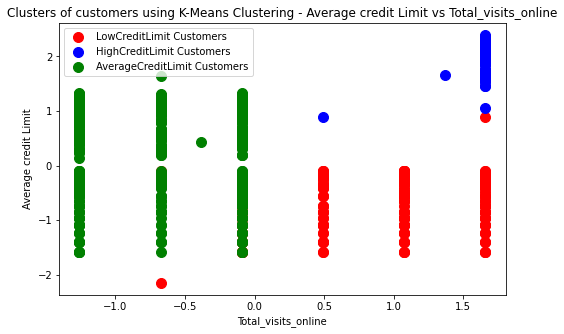

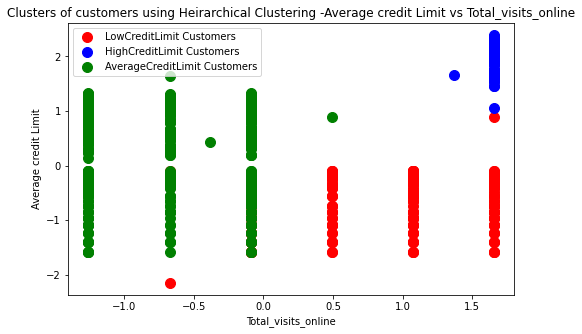

In [87]:



#Plotting Average credit Limit and the Total_visits_online---- Kmean


plt.figure(figsize=(8,5))
plt.scatter(dfCredit_Scaled.iloc[L==0,3], dfCredit_Scaled.iloc[L==0,0], s = 100, c = 'red', label = 'LowCreditLimit Customers') 
plt.scatter(dfCredit_Scaled.iloc[L==1,3], dfCredit_Scaled.iloc[L==1,0], s = 100, c = 'blue', label = 'HighCreditLimit Customers')
plt.scatter(dfCredit_Scaled.iloc[L==2,3], dfCredit_Scaled.iloc[L==2,0], s = 100, c = 'green', label = 'AverageCreditLimit Customers') 
plt.title('Clusters of customers using K-Means Clustering - Average credit Limit vs Total_visits_online')
plt.ylabel('Average credit Limit')
plt.xlabel('Total_visits_online')
plt.legend()
plt.show()
#Plotting Average credit Limit and the Total_visits_online---- Hierarchical

plt.figure(figsize=(8,5))
plt.scatter(dfCredit_Scaled.iloc[L_H==2,3], dfCredit_Scaled.iloc[L_H==2,0], s = 100, c = 'red', label = 'LowCreditLimit Customers') 
plt.scatter(dfCredit_Scaled.iloc[L_H==1,3], dfCredit_Scaled.iloc[L_H==1,0], s = 100, c = 'blue', label = 'HighCreditLimit Customers')
plt.scatter(dfCredit_Scaled.iloc[L_H==0,3], dfCredit_Scaled.iloc[L_H==0,0], s = 100, c = 'green', label = 'AverageCreditLimit Customers') 
plt.title('Clusters of customers using Heirarchical Clustering -Average credit Limit vs Total_visits_online')
plt.ylabel('Average credit Limit')
plt.xlabel('Total_visits_online')
plt.legend()

plt.show()


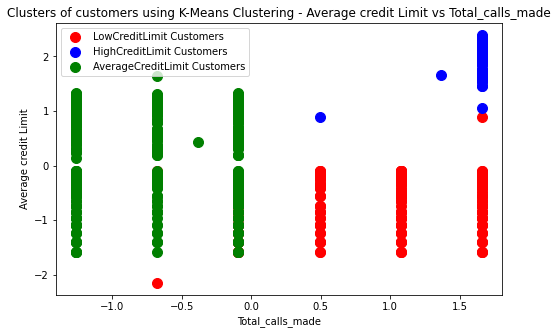

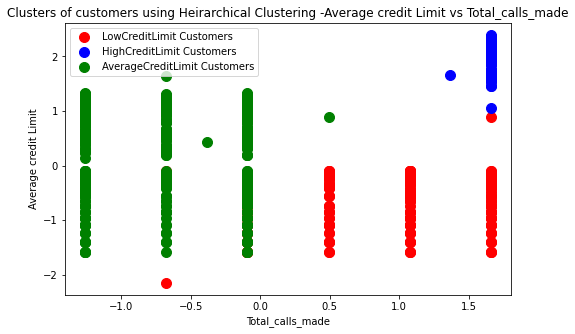

In [88]:

#Plotting Average credit Limit and the Total_calls_made ---- Kmean


plt.figure(figsize=(8,5))
plt.scatter(dfCredit_Scaled.iloc[L==0,3], dfCredit_Scaled.iloc[L==0,0], s = 100, c = 'red', label = 'LowCreditLimit Customers') 
plt.scatter(dfCredit_Scaled.iloc[L==1,3], dfCredit_Scaled.iloc[L==1,0], s = 100, c = 'blue', label = 'HighCreditLimit Customers')
plt.scatter(dfCredit_Scaled.iloc[L==2,3], dfCredit_Scaled.iloc[L==2,0], s = 100, c = 'green', label = 'AverageCreditLimit Customers') 
plt.title('Clusters of customers using K-Means Clustering - Average credit Limit vs Total_calls_made')
plt.ylabel('Average credit Limit')
plt.xlabel('Total_calls_made')
plt.legend()
plt.show()
#Plotting Average credit Limit and the Total_calls_made---- Hierarchical

plt.figure(figsize=(8,5))
plt.scatter(dfCredit_Scaled.iloc[L_H==2,3], dfCredit_Scaled.iloc[L_H==2,0], s = 100, c = 'red', label = 'LowCreditLimit Customers') 
plt.scatter(dfCredit_Scaled.iloc[L_H==1,3], dfCredit_Scaled.iloc[L_H==1,0], s = 100, c = 'blue', label = 'HighCreditLimit Customers')
plt.scatter(dfCredit_Scaled.iloc[L_H==0,3], dfCredit_Scaled.iloc[L_H==0,0], s = 100, c = 'green', label = 'AverageCreditLimit Customers') 
plt.title('Clusters of customers using Heirarchical Clustering -Average credit Limit vs Total_calls_made')
plt.ylabel('Average credit Limit')
plt.xlabel('Total_calls_made')
plt.legend()

plt.show()


### Insights 

### From the  Scatter plot for Kmeans & Hierarchical clustering  we can see very similar customer grouping  pattern. Almost all the ScatterPlots  are very similar for  this dataset 

### The values seems to be very similar . Only the labelling seems to be different . In Kmeans  group 0 is  with low creit limits but in case of Hierarchical clustering Group 2 is having the lowest  credit limits 


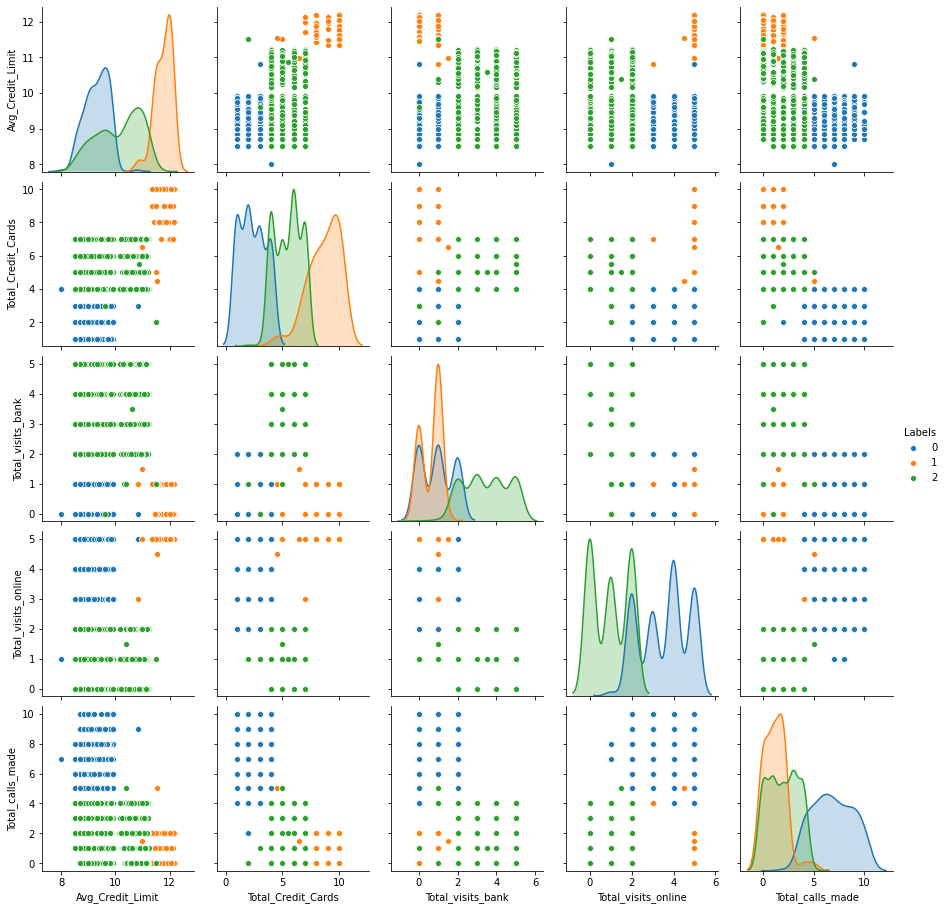

In [89]:
sns.pairplot(dfK_means,hue='Labels')

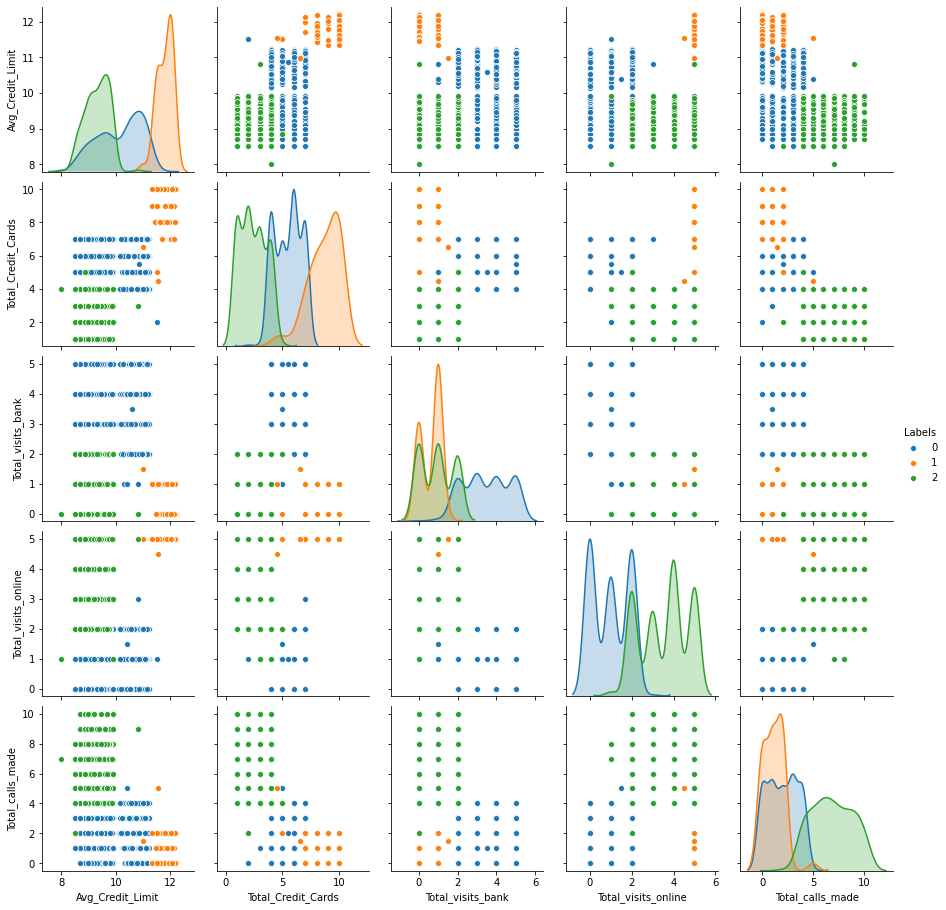

In [90]:
sns.pairplot(dfH_Clus,hue='Labels')

### Comparison of Kmeans and Heirarchical  : The cluster patterns are very evident from the above pairplots . The grouping is very similar in Kmeans and Hierarchical except  for  some data points 

### Q7. Analyse the clusters formed

### BoxPlot for Kmeans Clustering  

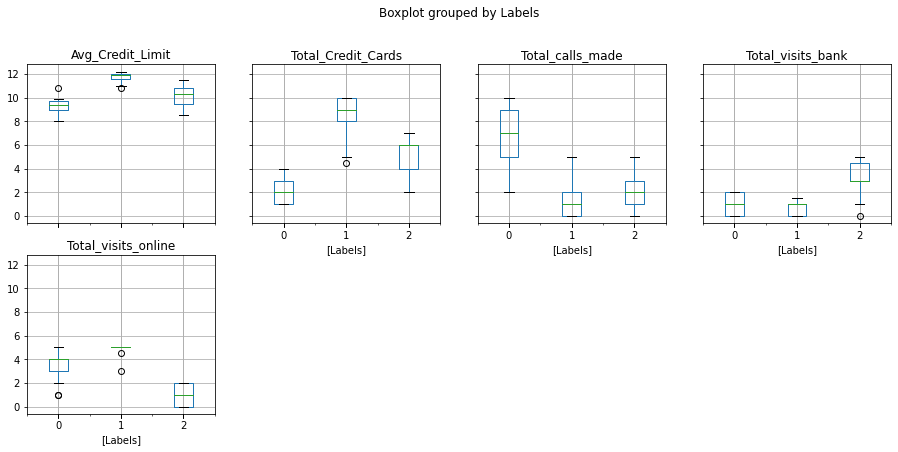

In [91]:
dfK_means.boxplot(by = 'Labels',  layout=(3,4), figsize=(15, 10))
plt.show()

### Insights    
: From the above Box Plot of K means clustering  we can infer
    ### Cluster 0   is with Low Credit Limit   and less number of cards . Contacts  mainly on  direct call to the bank  or they do online , Number of bank visits are low
    
    ### Cluster 1   is with High Credit Limit and more number of cards . This segmnet odf customers do their support mainly online , rarely calls or visits the bank
    
    ### Cluster 2   is with Medium Credit Limit . They prefer to Visit the bank  for support.

### BoxPlot for Hierarchical Clustering  

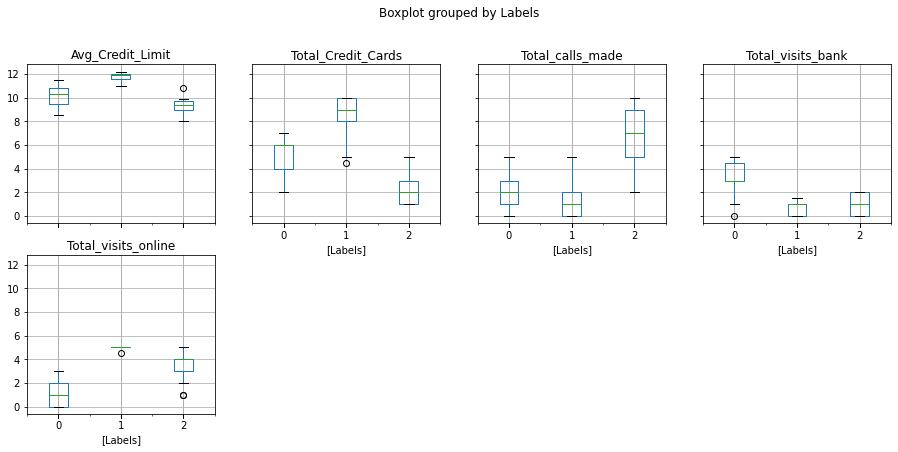

In [92]:
dfH_Clus.boxplot(by = 'Labels',  layout=(3,4), figsize=(15, 10))
plt.show()

# Insights    
: From the above Box Plot of Hierarchical clustering  we can infer   

       ### Cluster 1   is with High Credit Limit and more number of cards . This segmnet odf customers do their support mainly online , rarely calls or visits the bank     
       
    ### Cluster 0    is with Medium Credit Limit . They prefer to Visit the bank  for support.
    
    ### Cluster 2    is with Low Credit Limit   and less number of cards . Contacts  mainly on  direct call to the bank  or they do online , Number of bank visits are low

### Comparison of K Means clustering with 3 and 4  groups  and Hierarchical clustering

In [93]:
#GRoup the charccteristics for Barplot comaprison
#K-meas with K=3

Kmeans_3=dfK_means.groupby('Labels').apply(lambda x: x.mean()).T
Kmeans_3



Labels,0,1,2
Avg_Credit_Limit,9.317688,11.783395,10.147598
Total_Credit_Cards,2.402715,8.666667,5.500000
Total_visits_bank,0.941176,0.637255,3.481723
Total_visits_online,3.556561,4.950980,0.977807
Total_calls_made,6.877828,1.205882,2.007833
Labels,0.000000,1.000000,2.000000


#### Insights K-Means :   The three groups show very different characteristics    , All three groups hav e defferent preferred method for  solving their queries . The  marketing department can upsell the products based on current  Credit limit .

In [94]:
#GRoup the charccteristics for Barplot comaprison
#K-meas with K=3

dfH_Clus_3=dfH_Clus.groupby('Labels').apply(lambda x: x.mean()).T
dfH_Clus_3



Labels,0,1,2
Avg_Credit_Limit,10.152732,11.802668,9.315598
Total_Credit_Cards,5.505222,8.700000,2.414414
Total_visits_bank,3.479112,0.630000,0.945946
Total_visits_online,0.980418,4.990000,3.549550
Total_calls_made,2.007833,1.150000,6.864865
Labels,0.000000,1.000000,2.000000


#### Insights Heirarchical clusters  :   The three groups show very different characteristics    , All three groups hav e different preferred method of communicatin for  solving their queries . The  marketing department can upsell the products based on current  Credit limit .

### If you look at the average values of all  Three groups , The values seems to be very similar . Only the labelling seems to be different . In Kmeans  group 0 is  with low creit limits but in case of Hierarchical clustering Group 2 is having the lowest  credit limits 

In [95]:
## Customer % for each clusters 
dfK_means['Labels'].value_counts(normalize=True)*100

2    58.473282
0    33.740458
1     7.786260
Name: Labels, dtype: float64

In [96]:
#Kmeans with  Clusters =4
k4 = KMeans(n_clusters=4, n_init = 5, random_state=7)
k4.fit(dfCredit_Scaled)
L4=k4.labels_
# Data set with customer segmentation  for Kmeans
dfK_means_4 = dfCredit_New.copy()
dfK_means_4['Labels'] = L4

Kmeans_4=dfK_means_4.groupby('Labels').apply(lambda x: x.mean()).T
Kmeans_4

Labels,0,1,2,3
Avg_Credit_Limit,9.319798,10.770944,9.329873,11.783395
Total_Credit_Cards,2.395455,5.532258,5.449102,8.666667
Total_visits_bank,0.936364,3.407834,3.568862,0.637255
Total_visits_online,3.563636,0.956221,1.011976,4.950980
Total_calls_made,6.890909,2.055300,1.958084,1.205882
Labels,0.000000,1.000000,2.000000,3.000000


In [97]:
## Customer % for each clusters 
dfK_means_4['Labels'].value_counts(normalize=True)*100

0    33.587786
1    33.129771
2    25.496183
3     7.786260
Name: Labels, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

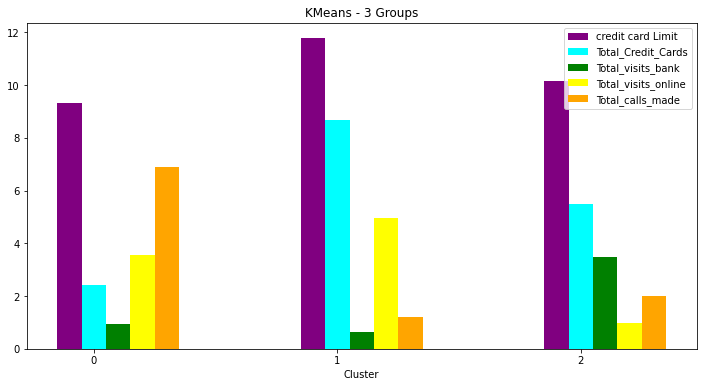

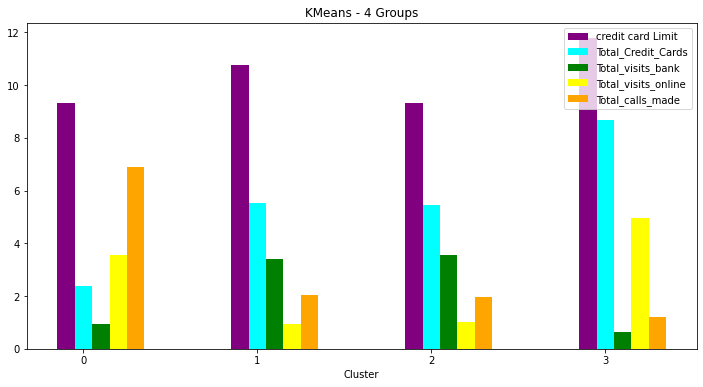

In [98]:
# Plot with 3 Clusters
plt.figure(figsize=(12,6))
X = np.arange(len(Kmeans_3.columns))
b1=plt.bar(X,  Kmeans_3.loc['Avg_Credit_Limit',:].values, color='purple', label = 'credit card Limit',width=.1) 
b2=plt.bar(X+.1,  Kmeans_3.loc['Total_Credit_Cards',:].values, color='cyan', label = 'Total_Credit_Cards',width=.1) 
b3=plt.bar(X+.2,  Kmeans_3.loc['Total_visits_bank',:].values, color='green', label = 'Total_visits_bank',width=.1) 
b4=plt.bar(X+.3,  Kmeans_3.loc['Total_visits_online',:].values, color='yellow', label = 'Total_visits_online',width=.1)
b4=plt.bar(X+.4,  Kmeans_3.loc['Total_calls_made',:].values, color='orange', label = 'Total_calls_made',width=.1) 
plt.xlabel("Cluster")
plt.title("KMeans - 3 Groups" )
plt.xticks(X + .1, ('0', '1', '2'))
plt.legend()
plt.show

# Plot with 4 Clusters
plt.figure(figsize=(12,6))
X = np.arange(len(Kmeans_4.columns))
b1=plt.bar(X,  Kmeans_4.loc['Avg_Credit_Limit',:].values, color='purple', label = 'credit card Limit',width=.1) 
b2=plt.bar(X+.1,  Kmeans_4.loc['Total_Credit_Cards',:].values, color='cyan', label = 'Total_Credit_Cards',width=.1) 
b3=plt.bar(X+.2,  Kmeans_4.loc['Total_visits_bank',:].values, color='green', label = 'Total_visits_bank',width=.1) 
b4=plt.bar(X+.3,  Kmeans_4.loc['Total_visits_online',:].values, color='yellow', label = 'Total_visits_online',width=.1)
b4=plt.bar(X+.4,  Kmeans_4.loc['Total_calls_made',:].values, color='orange', label = 'Total_calls_made',width=.1) 
plt.xlabel("Cluster")
plt.title("KMeans - 4 Groups")
plt.xticks(X + .1, ('0', '1', '2','3'))
plt.legend()
plt.show

### Conclusion with  3  Clusters KMeans
 .Clusters 0  1 and  2 are showing very distinctive charcacteristic here 

Cluster 0  has low credit limits  They would loke to do their support request on call  and the second  preferable channel is online . 34% of the customers belongs to this group
 
Cluster 1 has Highest credit limits  They would like to do their support request online . 8 % of customers belongs to this group
  
Cluster 2 has Average credit limits  .This segment of cusomers like to visit the bank in person to resolve their issues  . 58% of the the bakns customers belongs to this group
 

### Conclusion with  4  Clusters KMeans

Here cluster 0 and  2   shows very similar credit limits which is low   . But the  average number of cards are high in the case of cluster 2

Cluster 1 and cluster 2 has overlapping characteristics in support request  mode and the number of cards   

We can infer that clusteers with 3 segamets group customer effectively 

In [99]:
### Comparison of KMeans and Heirarchical using  bar plots

<function matplotlib.pyplot.show(*args, **kw)>

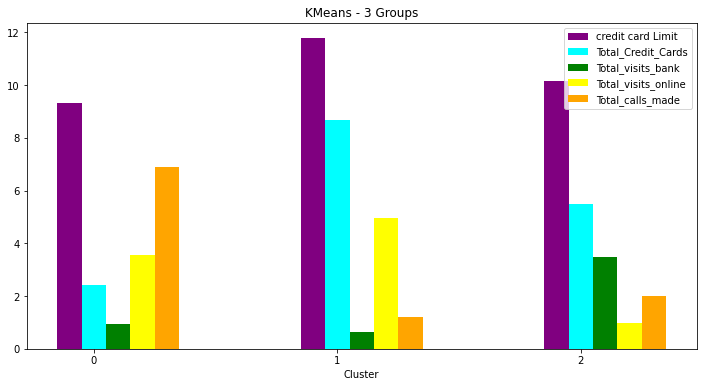

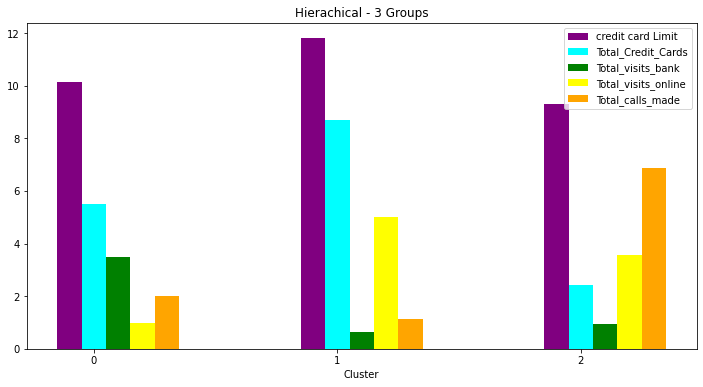

In [100]:
# Plot with 3 Clusters
plt.figure(figsize=(12,6))
X = np.arange(len(Kmeans_3.columns))
b1=plt.bar(X,  Kmeans_3.loc['Avg_Credit_Limit',:].values, color='purple', label = 'credit card Limit',width=.1) 
b2=plt.bar(X+.1,  Kmeans_3.loc['Total_Credit_Cards',:].values, color='cyan', label = 'Total_Credit_Cards',width=.1) 
b3=plt.bar(X+.2,  Kmeans_3.loc['Total_visits_bank',:].values, color='green', label = 'Total_visits_bank',width=.1) 
b4=plt.bar(X+.3,  Kmeans_3.loc['Total_visits_online',:].values, color='yellow', label = 'Total_visits_online',width=.1)
b4=plt.bar(X+.4,  Kmeans_3.loc['Total_calls_made',:].values, color='orange', label = 'Total_calls_made',width=.1) 
plt.xlabel("Cluster")
plt.title("KMeans - 3 Groups" )
plt.xticks(X + .1, ('0', '1', '2'))
plt.legend()
plt.show

# Plot with 3 Clusters
plt.figure(figsize=(12,6))
X = np.arange(len(dfH_Clus_3.columns))
b1=plt.bar(X,  dfH_Clus_3.loc['Avg_Credit_Limit',:].values, color='purple', label = 'credit card Limit',width=.1) 
b2=plt.bar(X+.1,  dfH_Clus_3.loc['Total_Credit_Cards',:].values, color='cyan', label = 'Total_Credit_Cards',width=.1) 
b3=plt.bar(X+.2,  dfH_Clus_3.loc['Total_visits_bank',:].values, color='green', label = 'Total_visits_bank',width=.1) 
b4=plt.bar(X+.3,  dfH_Clus_3.loc['Total_visits_online',:].values, color='yellow', label = 'Total_visits_online',width=.1)
b4=plt.bar(X+.4,  dfH_Clus_3.loc['Total_calls_made',:].values, color='orange', label = 'Total_calls_made',width=.1) 
plt.xlabel("Cluster")
plt.title("Hierachical - 3 Groups" )
plt.xticks(X + .1, ('0', '1', '2'))
plt.legend()
plt.show


### Conclusion on Kmeans and Hierarchical  clusters- Bar Plot
THe group ccharacteristics are very similar   in both clustering method s. Only the group  naming seems to be different . Kmeans group 0  is same as Hierarchical group 2 

## Key Questions:



### 1. How many different segments of customers are there?

#### Ans  :
There are 3 distictive segments of customers who can be identified by very specfic  pattern in  support request preferred method and   the credit limits

### 2. How are these segments different from each other?

#### Ans : 

They 3 different clusters are characterised by their credit limits and their preferred mode of support types . Using these combination of  characterstics  we can identify the segments very distictively for the problem in hand

Cluster 0  has low credit limits  They would like to do their support request on call  and the second  preferable channel is online . 34% of the customers belongs to this group
 
Cluster 1 has Highest credit limits  They would like to do their support request online . 8 % of customers belongs to this group
  
Cluster 2 has Average credit limits  .This segment of cusomers like to visit the bank in person to resolve their issues  . 58% of the the bank's customers belongs to this group
 


### 3. What are your recommendations to the bank on how to better market to and service these customers?

###  Recommendations

#### For Cluster  0 :   For this cluster as their current credit card limit is  low , the Marketing department can approach them to  extend the credit limits  . To Serve this group better the bank needs to concentrate on their call center and online services. This customer segment is the second largest cluster with 34%  of clients belonging to this . The bank  has to concentrate on the call center service and reduce the call waiting time  as this communication   methods seems to be the preferred one for this segment


#### For Cluster  1 :   To Serve this group better the bank needs to concentrate on their online services. The Marketing department can market the products online  ,as  this cluster tends to go online . For this segment the bank can improve their services by  sending important notifications  such as due dates , reminders  etc, They can develop a great mobile app with ease of use ,  introduce customised  interface options in their apps and should try to better their mobile banking services. 

#### For Cluster  2 :  This segment is the largest cluster for the bank with  58%  of the customers belonging to the group .  From the analysis this group loves human interaction . They  vsit the bank to solve their issues  .  This means the Bank should concentrate heavily on their branchs  and make them customer friendly with an effective queing system.  Typically this segment have Average card limit , The Marketing department can approach them to increase the card limits or sell more products  to them , if in person the bank can attract more customers from this segment.